Dataset source: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset?select=data.csv

>[Notebook 1: Exploratory Data Analysis of Global News Dataset](#scrollTo=kVnPWN3HJrsv)

>>[Part 1: Look at the Big Picture](#scrollTo=l-343xhoM_5m)

>>>[Research Questions Overview](#scrollTo=vtXW-0WsyDoU)

>>[Part 2: Load Dataset](#scrollTo=rncpuLXcKDBE)

>>[Part 3: Exploratory Data Analysis Profiling Report](#scrollTo=tJDmL5K9j6-J)

>>[Part 4: Data Cleaning and Wrangling](#scrollTo=rA87CtrdnQ7D)

>>>[Data Overview](#scrollTo=eqKk1iL2Uc_5)

>>>[Data Cleaning and Wrangling](#scrollTo=6tS5h_AhyeXC)



# Notebook 1: Exploratory Data Analysis of Global News Dataset

## Part 1: Look at the Big Picture

### Research Questions Overview

The Research Questions we will explore for this dataset are given in the table below as follows:

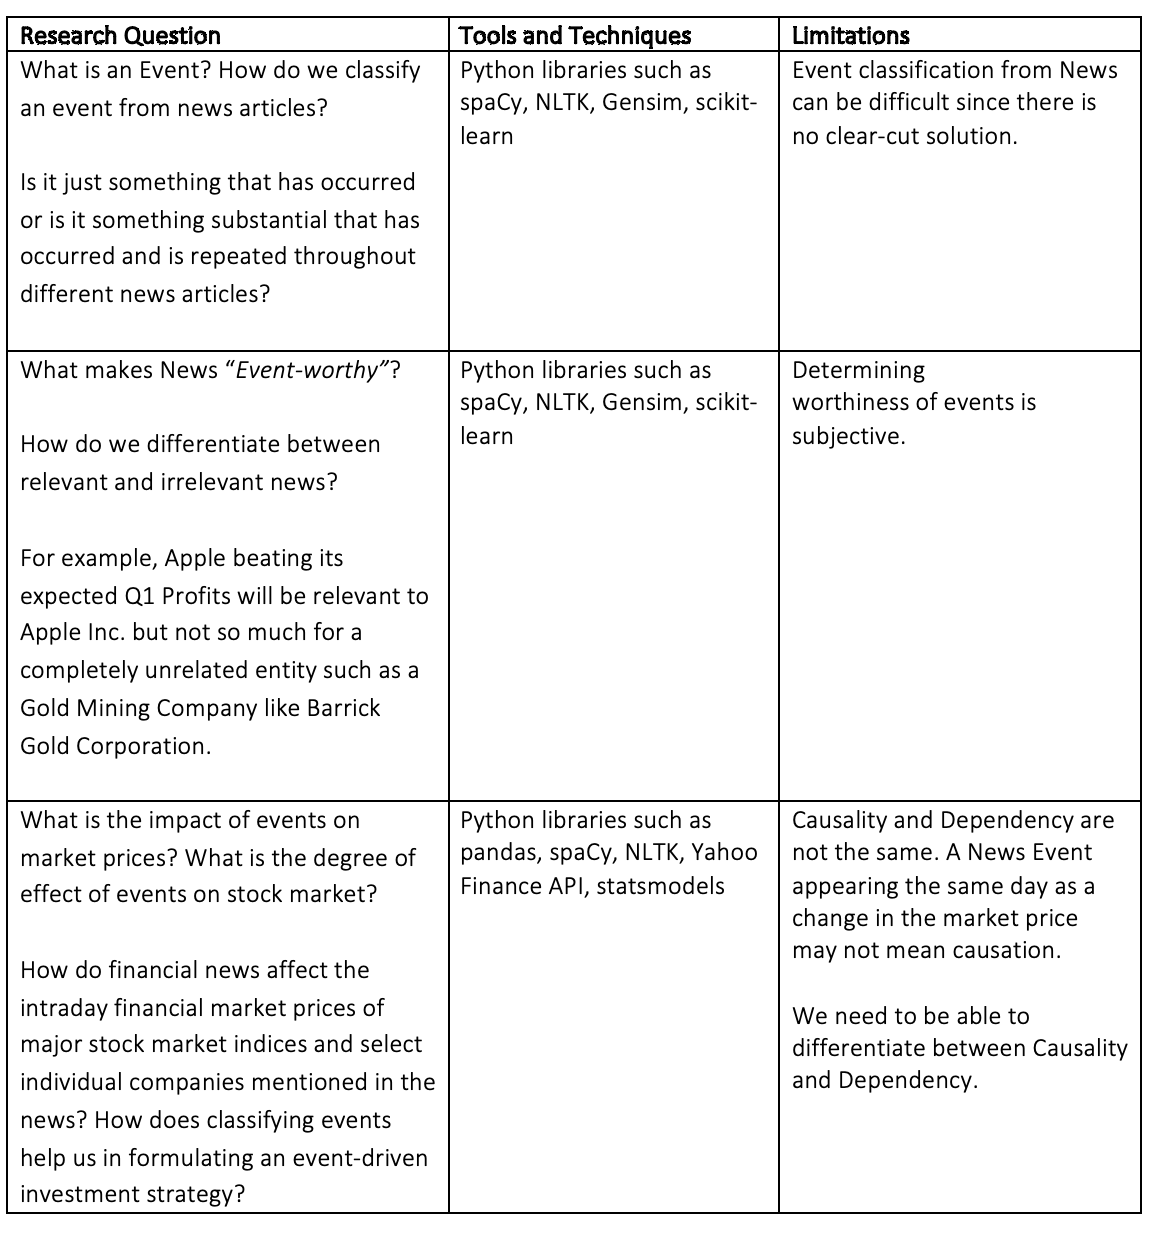

## Part 2: Load Dataset



First and foremost we load the dataset and inspect the data

In [3]:
cd /content/drive/MyDrive/CIND820

/content/drive/MyDrive/CIND820


In [4]:
# install required libraries
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=3e0b19d1d85aebc3bf02a700f96542dbe25bdb3cd216837fb40a918784029b82
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [5]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# load all datasets
data_df = pd.read_csv('global_news/data.csv')
rating_df = pd.read_csv('global_news/rating.csv')
# Converted all datatypes in raw_data.csv to 'object' to standardize datatypes in each column
raw_df = pd.read_csv('global_news/raw-data.csv', dtype='object')

The datasets have the same column headers mostly therefore I merge the dataframes into a master dataframe to conduct the analysis:

In [7]:
# merge dataframes into master dataframe
master_df = pd.concat([data_df, rating_df, raw_df], axis=0)

# reset index
master_df.reset_index(drop=True, inplace=True)

In [8]:
master_df.shape

(1096988, 14)

In [9]:
master_df.dtypes

article_id         object
source_id          object
source_name        object
author             object
title              object
description        object
url                object
url_to_image       object
published_at       object
content            object
category           object
full_content       object
article            object
title_sentiment    object
dtype: object

In [10]:
master_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,NaN,NaN
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,NaN,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,NaN,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,NaN,NaN
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN,NaN,NaN


## Part 3: Exploratory Data Analysis Profiling Report

Before we do any data cleaning or wrangling let's see what an EDA report looks like:

In [11]:
from ydata_profiling import ProfileReport

In [12]:
# Disclaimer: this profiling report was generated using a sample of 20% of the original dataset since taking the whole dataset crashed
# take a sample of the dataset
sample_df = master_df.sample(frac=0.20)

In [11]:
# generate profiling report
profile_report = ProfileReport(
    sample_df,
    sort=None,
    html={
        "style": {"full_width": True}
    },
    progress_bar=True,
    correlations={
        "auto": {"calculate": True},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },
    explorative=True,
    title="Profiling Report"
)

In [12]:
profile_report.to_file("reports/EDA_profiling_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile_report

Output hidden; open in https://colab.research.google.com to view.

## Part 4: Data Cleaning and Wrangling

### Data Overview
**Let's divide up the dataset according to the attribute type:**

Textual attributes are:
- source_name
- author
- title
- description
- url
- url_to_image
- content
- category
- full_content
- article
- title_sentiment

Non-textual attributes are:
- article_id
- source_id
- published_at

### Data Cleaning and Wrangling

In [13]:
# types of categories
master_df['category'].unique()

array(['Nepal', 'New Zealand', 'Hiking', 'Sustainability', 'Europe',
       'Oman', 'Politics', 'Pakistan', 'Panama', 'Games', 'News',
       'Papua New Guinea', 'Poland', 'Climate', 'Qatar', 'YouTube',
       'Peru', 'Artificial Intelligence', 'America', 'Puerto Rico',
       'Real estate', 'Philippines', 'Weather', 'Palau', 'Romania',
       'Armenia', 'Amazon', 'Love', 'COVID', 'Paraguay', 'Music', 'Cars',
       'Photography', 'Stock', 'Space', 'History', 'Food', 'Art',
       'Bitcoin', 'Fashion', 'TikTok', 'Design', 'Technology',
       'Architecture', 'Motivation', 'Home', 'Asia', 'Relationships',
       'Coding', 'Beauty', 'Finance', 'Africa', 'Ghana',
       'Russian Federation', 'Rwanda', 'Nutrition', 'Anime', 'Podcasts',
       'Yoga', 'Cryptocurrency', 'Sudan', 'Singapore', 'Blockchain',
       'Startups', 'Productivity', 'Health', 'Uganda', 'Samoa', 'Yemen',
       'Chad', 'Philosophy', 'world', 'Movies', nan, 'Google', 'Facebook',
       'Jobs', 'Travel', 'Sports', 'Scien

In [14]:
len(master_df['category'].unique())

259

In [15]:
# filter relevant columns
relevant_columns = ['Stock', 'Finance']

filtered_df = master_df[master_df['category'].isin(relevant_columns)].copy()

In [16]:
# reset index
filtered_df.reset_index(drop=True, inplace=True)

In [17]:
filtered_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49.000000,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44.000000,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25.000000,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28.000000,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02.000000,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN


In [18]:
filtered_df.shape

(33029, 14)

In [19]:
# check for missing values
filtered_df.isnull().any()

article_id         False
source_id           True
source_name        False
author              True
title               True
description         True
url                False
url_to_image        True
published_at       False
content             True
category           False
full_content        True
article             True
title_sentiment     True
dtype: bool

In [20]:
# check for missing values
filtered_df.isnull().all()

article_id         False
source_id          False
source_name        False
author             False
title              False
description        False
url                False
url_to_image       False
published_at       False
content            False
category           False
full_content       False
article            False
title_sentiment    False
dtype: bool

In [21]:
# see datatypes
filtered_df.dtypes

article_id         object
source_id          object
source_name        object
author             object
title              object
description        object
url                object
url_to_image       object
published_at       object
content            object
category           object
full_content       object
article            object
title_sentiment    object
dtype: object

In [22]:
# datatype conversions
# Convert 'published_at' to datetime
filtered_df['published_at'] = filtered_df['published_at'].apply(pd.to_datetime)

In [23]:
filtered_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN


In [24]:
# check for duplicates
filtered_df.duplicated(subset='article_id').all()

False

In [25]:
# check for missing rows
filtered_df[filtered_df.isnull().all(axis=1)==True]

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment


In [53]:
# convert to string
filtered_df['full_content'] = filtered_df['full_content'].apply(str)
# replace nans with empty string
filtered_df['full_content'] = filtered_df['full_content'].replace({pd.NA: '', 'nan': ''})

# do the same for article column
filtered_df['article'] = filtered_df['article'].apply(str)
filtered_df['article'] = filtered_df['article'].replace({pd.NA: '', 'nan': ''})

# do the same for description column
filtered_df['description'] = filtered_df['description'].apply(str)
filtered_df['description'] = filtered_df['description'].replace({pd.NA: '', 'nan': ''})

# do the same for content column
filtered_df['content'] = filtered_df['content'].apply(str)
filtered_df['content'] = filtered_df['content'].replace({pd.NA: '', 'nan': ''})

# do the same for title column
filtered_df['title'] = filtered_df['title'].apply(str)
filtered_df['title'] = filtered_df['title'].replace({pd.NA: '', 'nan': ''})

In [54]:
# concatenate relevant text attributes
filtered_df['all_text'] = filtered_df[['title', 'description', 'content', 'full_content', 'article']].apply(lambda x: ' '.join(x), axis=1)


In [56]:
# export dataframe to csv for further processing
filtered_df.to_csv('filtered_data.csv', index=False)